# Building a Causal Models

We've seen now how there is a huge class of problems tha predictive models can't solve. Those are mostly problems where you want to figure out how to change some treatment \\(T\\) in order to arrive at a desired outcome \\(Y_{max}\\). We went through the example of figuring out how much discount should we give for each customer, but there is no shortages of exemples in this category: what is the credit line you should give on a credit card? What days of the year should you do sales? How much should you charge for whatever product? To better grasp the problem, you can think about the entities you have (be that customers, days, stores) as points in a Treatment and Outcome plot.

![img](./data/img/causal-model/customers.png)

Your intuition tells you that there is probable some sort of personalization you can do here. For instance, sure you could give everyone the same discount on a prodcut, but it is probably the case that there are people for whom the discount would be better. Making this intuition more precise, we could say that you think there are entities that are more responsive to the treatment than others. If that is the case, you want to partition your entitie space in such a way that it groups the units with high responsive together and, at the same time, separates them from the units with low response. 

The problem with prediction model is that it essentially partitions the space on the thing it predicts, that is, on the outcome \\(Y\\). 

![img](./data/img/causal-model/y-partition.png)

By definition, the goal of prediction is to produce a new dimesions, \\(\hat{Y}\\), where the thing you are trying to predent doesn't change much along constant values of this dimension. If you make a model that predict sales and you look at groups of entities with the same sales prediction, the real or observed sales should't change much in that group (if your model is any good at making predictions, that is).

Here is another way of putting it: looking at partitions defined by a prediction model of \\(Y\\), by definition, loweres the range in wich \\(Y\\) can vary. And thats a huge problem if your goal is not prediction, but understanding how \\(Y\\) changes with \\(T\\). Because if the changes in \\(Y\\) are sudently contrained, or if \\(Y\\) is sudently held fixed by your prediction, you won't see it changing once you move \\(T\\). 

![img](./data/img/causal-model/y-split.png)

This is what is shown in the image above. Once you partition your data on the outcome axis, you focebly make it so that \\(Y\\) can't change much if you move \\(T\\), which hinders your hability to know how \\(T\\) afects \\(Y\\). 

Of course this is a rather dramatized case, because in real life you almost never predict \\(Y\\) that well, so it will varie even for groups defined by the same prediction. But the central idea remains: focusing on prediction does not move you in the right direction when your goal is to estimate elasticity, that is, \\(\frac{\Delta Y}{ \Delta T}\\).

So what does? Here is an idea. What if instead of predicting \\(Y\\), we tried to predict the derivative \\(\frac{\delta Y}{ \delta T}\\). If we could do manage to do that, what would hopfully hapen is that we would split the space somwhat like the following image

![img](./data/img/causal-model/elast-partition.png)

That would be wonderfull because now, we would then be able to estimate different elasticities on each partition. And notice here that the elasticity is just the slope of the line or function that goes from \\(T\\) to \\(Y\\). So, if we can produce partitions where the slope or elasticity different, it means that entities have different responsivness to the treatment, and then we can personalise. On other words, what you want is to move away from predicting \\(Y\\) in its raw form and start to predict the derivative of \\(Y\\) on \\(T\\),  \\(\frac{\delta Y}{ \delta T}\\)

![img](./data/img/causal-model/elast-split.png)

For example, suppose that \\(Y\\) is icecream sales, \\(T\\) is icecream price and each entity is a day of the year. Let's set moral issues aside, for the sake of the argument, and predent that you can change the price of icecream every day. If you can somehow find the days where \\(\frac{\Delta Sales}{ \Delta Price}\\) **is low**, that that means you can increase prices without loosing sales on those days. Perhaps you do this already, say, when you increase them on holliday season. The point being, it usefull to you to diferentiate days in terms of the price elasticity, because it gives you some basis on how to set prices.

Ok, you might say, but this is kind of triky. How can I predict elasticity \\(\frac{\delta Sales}{ \delta Price}\\) if I can't observe it. That's a very good point. Elasticity is essentially non observable on an entity level. To conceptualise it, you can think about each entity as having a \\(Y_i\\) value, sales in our example, but also an individual elasticity. The elasticity is how much \\(Y\\) changes with \\(T\\), so you can think about each entity also having a sope coneficient associeted to it \\(\frac{\delta Y}{ \delta T}_i\\). In our example, we would say each day has a slope coeficient of price on sales.

![img](./data/img/causal-model/elasticity.png)

Of course, we can't see those individual slope coeficients. For us to see the individual slopes, we would had to see each day under two different prices and see how the sales changes for each of those prices

$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$

This is the fundamental problem of causal inference all over again. We can't never see the same entity under different treatment conditions.

## Predicting Elasticity

We got to a complicated situation here. We figured that predicting \\(Y_i\\) would actualy hinder our capacity of figuring our how to chnage \\(Y\\) using \\(T\\). Rather, to solve that problem, we would have to predict the elasticity \\(\frac{\delta Y_i}{ \delta T_i}\\). Saddly, we can't observe elasticity, so what can we do??

Here is an idea. You can still fit a linear model

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$

If you diferentiate the thing above on the treatment, you will end up with

$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$

And since you can estimate the model above to get \\(\hat{\beta_1}\\), we can say that **you can predict elasticity even though you can't observe it**. In the case above, it is a rather simple prediction, that is, we are predicting the constant vale \\(\hat{\beta_1}\\) for everyone. This doesn't help us in our task of grouping entities acording to how responsive they are to the treatment, simply because everyone gets the same elasticity prediction. However, we can do the following change

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i  + e_i
$$

Which would give us the follow elasticity prediction

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$

Now, each entity defined by a different \\(X_i\\) will have a different elasticity prediction. In other words, the elasticity prediction will change if the features \\(X_i\\) changes. Now we are getting somewhere. The model above allows us to make an elasticity prediction for each of our entities. Than, we can take the ones that have high predicted elasticity and group them together. We can do the same with the ones that have low predicted sensitivity to the treatment. Now, with our elasticity predictions, we can group entities by how much we think they will respond to the treatment.

Let's now walk through an example of how to make this sort of elasticity model. Let's consider our icecream example. Each unit \\(i\\) is a day. For each day, we know if it's a weekday or not, how much it costed us to make our icecream (you can think of cost as a proxy for quality) and the average temperature for that day. Those will be our feature space \\(X\\). Then, we have our treatment, price, and our outcome, the number of icecream sold. For this example, we will consider that the treatment is randomized, just so that we don't have to worry with bias for now. To make this more plausible, think about the icecream maker as having a statistical degree.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Just as we do with prediction model, we will also split our dataset into a training and a testing sample. We will estimate the model on the first and make predictions on the last.

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

The first model we will consider is the following linear model

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$

If we inspect the parameters of this model, we can see that what our predicted elasticity will look like. 

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


For \\(m1\\), the predicted price elasticity \\(\widehat{\frac{\delta y_i}{\delta t_i}}\\) will be given by \\(\hat{\beta_1}\\), which is -2.75, in our case. This means that for each aditional BRL we charge for our icecream, we should expect sales to go down by about 3 units. 
Notice how this \\(m1\\) predicts the exact same elasticity for everyone. Hence, it is not a very good model if we want to know on which days are people less sensitive to icecream price increases. Remember that our goal is to partition the entities in such a way that we can personalize and optimize out treatment, price, for each individual partition. To correct for that, consier our second model:

$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i * + \pmb{\beta_3}X_i + e_i
$$

This second model includes an interaction term between price and temperature. This means that it allows the elasticity to differ for diferent temperatures.

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


Once we estimate the model, the predicted elasticity is given by

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_3}temp_i
$$

Notice that \\(\hat{\beta_3}\\) is positive 0,24. This means that, for each aditional degree, people become less sensitive to price increases on icecream. For example, at \\(25C^o\\), for each aditional BRL we charge, our icecream sales go down by 2.8 units \\((-3.6 + (0.03 * 25))\\). But at  \\(35C^o\\), for each aditional BRL we charge, they go down only by 2.5 units \\((-3.6 + (0.03 * 35))\\). This is also sort of intuitive. As the days get hotter and hotter, people are willing to pay more for icecream.  

We can go even further. The next model includes interaction terms on all the feature space. This means that elasticity will change with temperature, day of the week, and cost.

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$


In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

According to the above model, the individual level elasticity would be given by

$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$

Where \\(\beta_1\\) is the price coeficient and \\(\pmb{\beta_2}\\) is the vector for the interaction coeficients. 

Finally, let's see how to actually make those elasticity predictions. One way to do them is to actually extract the elasticity parameters from the model and use the above formula. However, we will resort to a more general aproximation. Since elasticity is nothing more than the derivative of the outcome on treatment, we can resort to the definition of the derivative.

$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$

with \\(\epsilon\\) going to zero. We can aproximate this definition replacing \\(\epsilon\\) by 1. 

$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$

where \\(\hat{y}\\) is given by our model's predictions. In words, I'll make two predictions with my models: one, passign the original data and another, passing the original data but with the treatment incremented by one unit. Below, you can see a function for doing that.

In [7]:
def pred_elasticity(m, df, t="price"):
    return df.assign(**{
        "pred_elast": m.predict(df.assign(**{t:df[t]+1}))  - m.predict(df)
    })

pred_elasticity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


If we make elasticity predictions using \\(m1\\), we will notice that it predicts the exact same value for all the days. That's because there are no interaction terms on that model. However, if we make predictions using \\(m3\\), it outputs a different elasticity prediction for each day. 

In [8]:
pred_elast3 = pred_elasticity(m3, test)

np.random.seed(1)
pred_elast3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


Notice how the predictions are numbers that go from something like -9 to something 1. There are not predictions of the sales column, which is in the order of the hundreds. Rarther, **it's a prediction of how much sales would change if we increased price by one unit**. Right out of the bet, we can see some strange numbers. For example, take a look at day 4764. It's predicting a positive elasticity. In other words, we are predicting that price sales will increase with an increase in prices. This doesn't appeal to our economic sense, so we can use our intuition to correct that. Remember that causal inference is sort of an art, where inutuition about how the world works has to go hand in hand with the analysis of the data.

If you choose to do that, the following code will force the elasticity prediction to be negative or zero.

In [9]:
pred_elast3["pred_elast"] = np.clip(pred_elast3["pred_elast"], -np.inf, 0)

Now, let us contrast this elasticity or causal model with a purely predictive model. We will use a Machine Learnig algorithim that uses as features price, temperature, weekday and cost and tries to predict icecream sales using those variables. 

In [10]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890126

We can use this model to make predictions about how much sales we will have on each day. To contrast both models, lets use them for what we intended on the first place: partitioning our entitie base. For each model, we will partition the entities into 2 groups. Our hope is that one group is higly responsive to price increase while the other not so much. If that is the case, we can organize our business around those groups: for the days that fall in the high responsivness group, we better not set prices to hight. For the low responsivness group, we can increase price without risking too much in sales.

In [11]:
bands_df = pred_elast3.assign(
    elast_band = pd.qcut(pred_elast3["pred_elast"], 2),
    pred_sales = ml.predict(pred_elast3[X]),
    pred_band = pd.qcut(ml.predict(pred_elast3[X]), 2),
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.000000,"(-0.00555, 0.0]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.000000,"(-0.00555, 0.0]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


One very simple way to check how good those partition schemas are is to plot a regression line of prices on sales for each partition. Below, we can see the one for the partitions made using the elasticity predictions

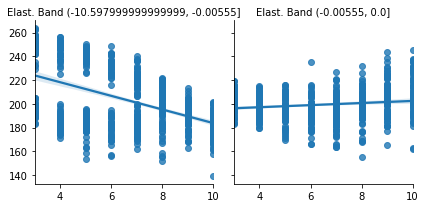

In [12]:
g = sns.FacetGrid(bands_df, col="elast_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Elast. Band {col_name}");

As we can see, it looks like this partitioning schema is usefull. For the first partition, it looks like there is a high sensitivity to prices. It looks like sales go down by a lot for each aditional price inccrease we observe. 

Contrast this with the partitions made using the ML prediction model.

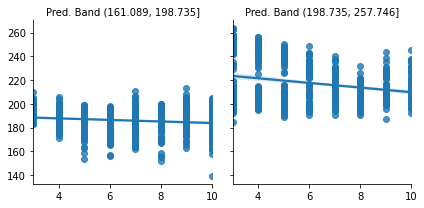

In [13]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

It looks like the model partitions the customer on the y axis. This is expected. It is a model to predict sales. Hence, we hope that partitions that are defined with it have different spend levels. However, thats not particurlaly usefull here. Once we look at the slopes of the lines, we see that they don't change much. That is, both partitions, as defined by the prediction model, have about the same reponsivness to price increase. This means we can't use this model to figure out how we should set our prices depending on the conditions of the day. 

## Caveats

The theory around this sort of causal models, how to build them and how to usem them, is quite slim. Most of the things here I gathered from my professional experience, which I'm not so sure about everything. For this reason, I feel I must point out some problems with this approach so that you can hopfuly continue from where I left off. 

First, it is not always the case that a prediction model is not good for partitioning the data on elasticity or responsivness. When elasticity is correlated with the outcome, a prediction model will be very decent. In our icecream sales example, suppose that people are less responsive to price increases on the weekend and when it's hot. Well, its not crazy to think that those are also the conditions when we sell more icecream. Hence, if that is the case, sales is correlated with the elasticity of sales on prices and a prediction model for sales can be very usefull for partitioning elasticity.

Seccond, **prediction models hinders our capacity to learn elasticity insofar as they use the treatment to make the prediction**. That has to do with the way we are trying to learn about elasticity: first, we partition the data according to something (usualy a model), then, we look at the elasticity in each partition. This means that the outcome \\(y\\) needs to change in the partition as we change \\(t\\). That capacity to change gets contrained if the model learn how \\(t\\) affects \\(y\\) to make its predictions. Notice that you simply not giving the model the treatment feature doesn't solve that, because if the treatment is no random, the model can learn its relationship with the outcome even without having direct access to it. 

However, if you have a randomized treatment and you don't give the treatment to your model, there is no way it can learn the relationship between the treatment and the outcome. If that is the case, **your prediction model can be usefull for causal inference**, because it constraint the outcome from varying for reasons other than thre treatment. That's a good thing, because, after controling for that prediction model, the changes in the outcome should be mostly due to the treatment, since the model explained away the other variables. To see this process in action, look what hapens when we remove the `price` variable from our ML model

In [14]:
X = ["temp", "weekday", "cost"]
y = "sales"
ml2 = GradientBoostingRegressor()
ml2.fit(train[X], train[y]);

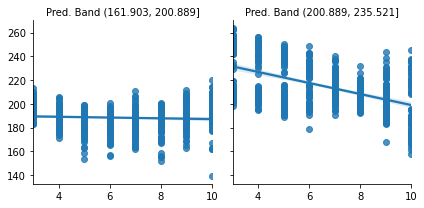

In [15]:
pred_rnd_ml = test.assign(pred_band = pd.qcut(ml2.predict(test[X]), 2))

g = sns.FacetGrid(pred_rnd_ml, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

It actually produces partitions we differen elasticyties! With these partitions, we can personalise price, probably seting it higher for day that fall in the second partition and lower for days in the first partition.

Finally, all of these caveats considered, I still think it is generaly a bad idea to use prediction models when your goal is to personalize or optimize whatever treatment you have at your disposal. The maisn reason for that is that, whenever prediction model to split elasticity, it seems kind of acidental to me. Rather, it makes more sense to model the thing you are after direcly, instead of hoping that a prediction model will somehow capture it. 

## Key Ideas

Here we saw how using prediction models can hinder our capacity to understand how a treatment affects an outcome. This is very problematic if our goal is not prediction, but rather optimization, where we want to set a value for \\(T\\) in order to maximise \\(Y\\). Lot's of business problems are on that format: deciding how much to charge for a product, figuring out what interest rate to set on a loand, deciding discount policies and so on. If that is our goal, we are much better off with causal models that predict elasticity: the sensitivity of the outcome on the treatment. Saddly, it's not at all obvious how to build those models. Since we can't observe elasticity direcly, it's hard to make a model that predicts it. Here, we used the idea of a linear regression model that is estimated to predict \\(Y\\), but, in doing so, gives us a way to also predict \\(\frac{\delta y}{\delta t}\\). To do that, we had to include interaction terms of the treatment and the features. This made it so that the elasticity changes as with different features. Then, we can have elasticity predictions and use those elasticity predictions to group our entities into more or less responsive to our treatment, utimatly helping us decide the treatment level for each group.

## References 

The things I've written here are mostly stuff from my head. I've learned through experience, not from any textbook. This means that there isn't a direct reference I can point you to. It also means that they have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts. 
